In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
from scipy.signal import find_peaks
from scipy.special import entr
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [2]:
d1= pd.read_csv(r'C:\Users\User\Desktop\testrundataset\healthyA3\gg.csv')
o1= pd.read_csv(r'C:\Users\User\Desktop\testrundataset\outerA2\ss.csv')
i1= pd.read_csv(r'C:\Users\User\Desktop\testrundataset\innerA3\pp.csv')
r1= pd.read_csv(r'C:\Users\User\Desktop\testrundataset\rollerA2\uu.csv')

In [3]:
d2= pd.read_csv(r'C:\Users\User\Desktop\testrundataset\healthyA2\ss.csv')

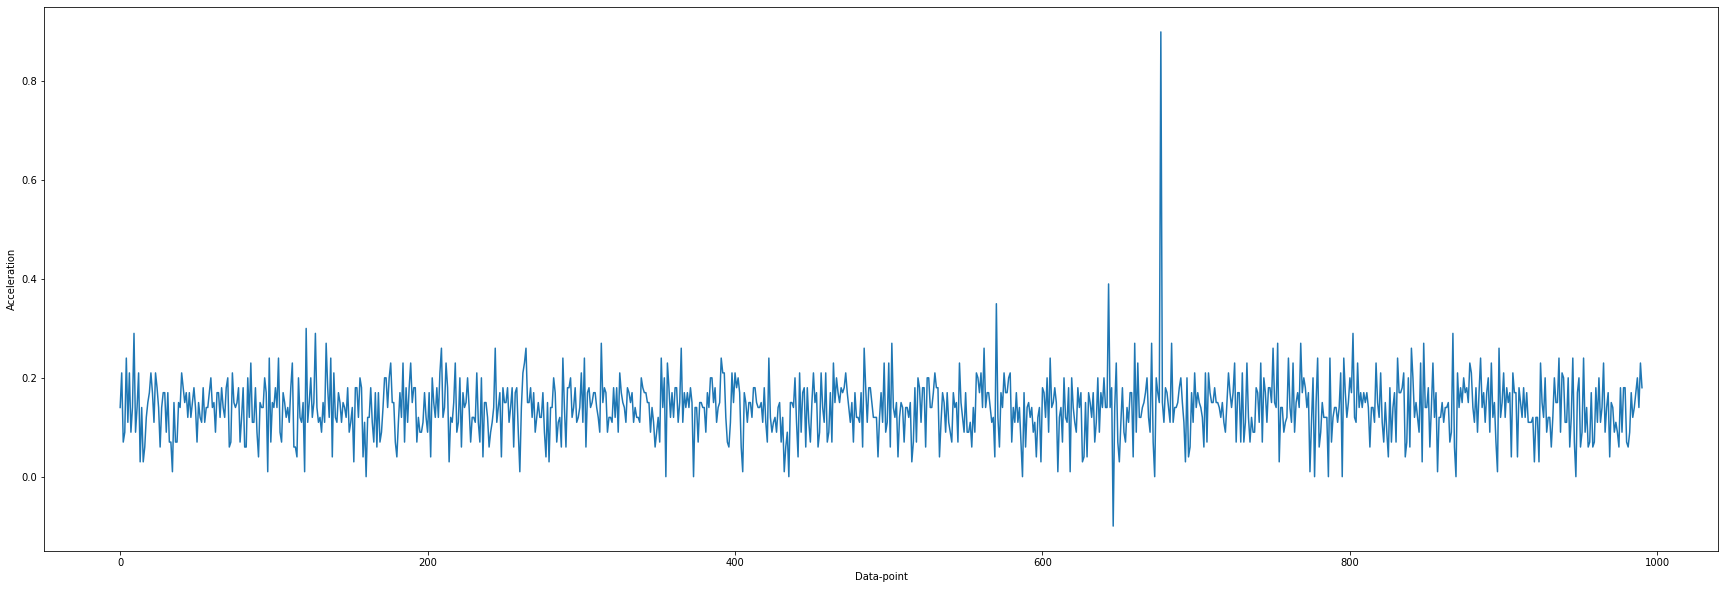

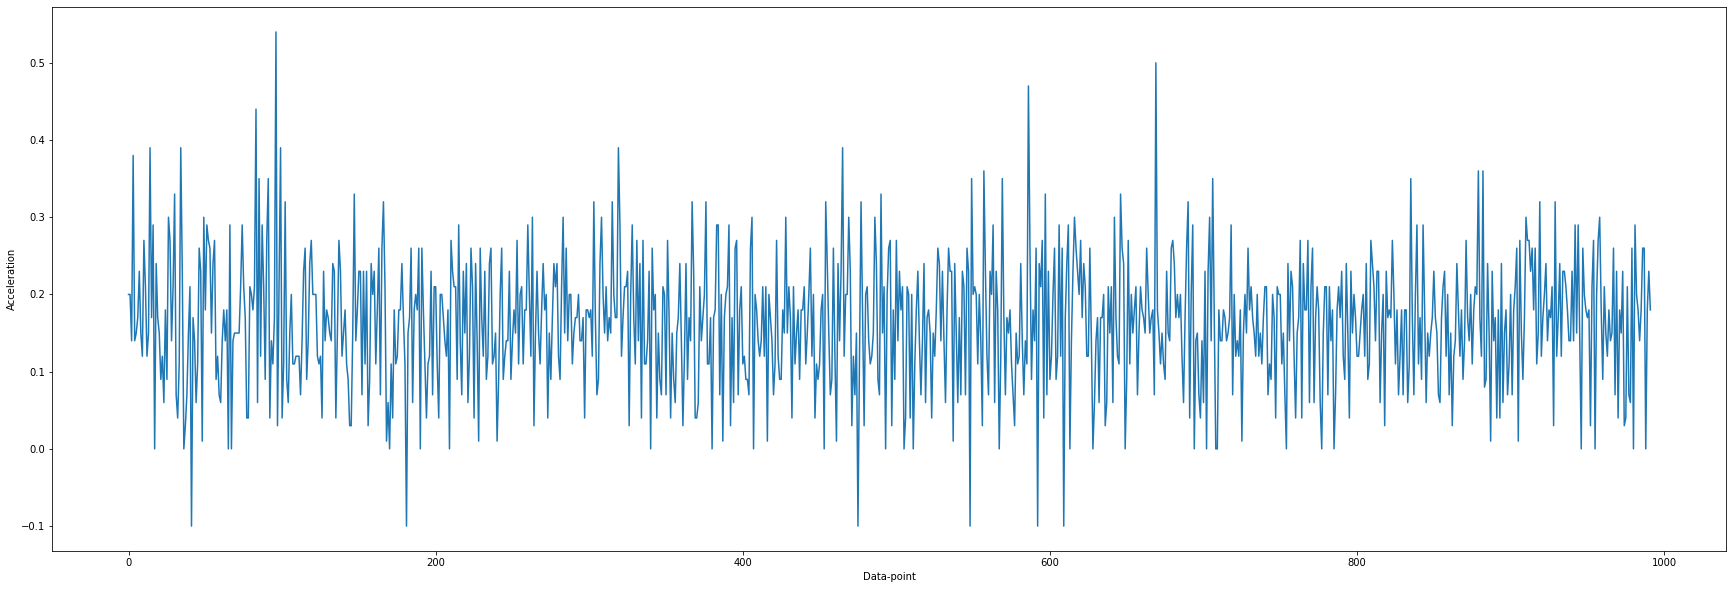

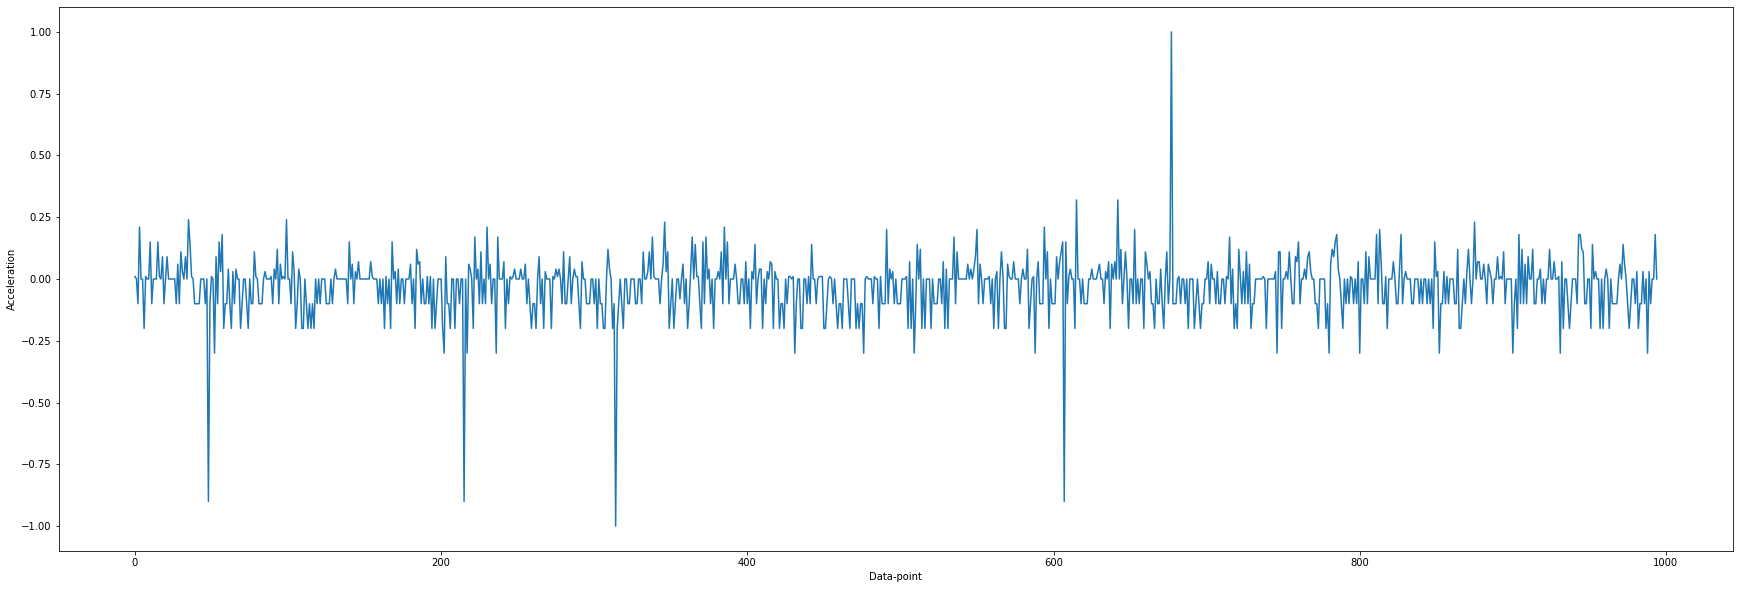

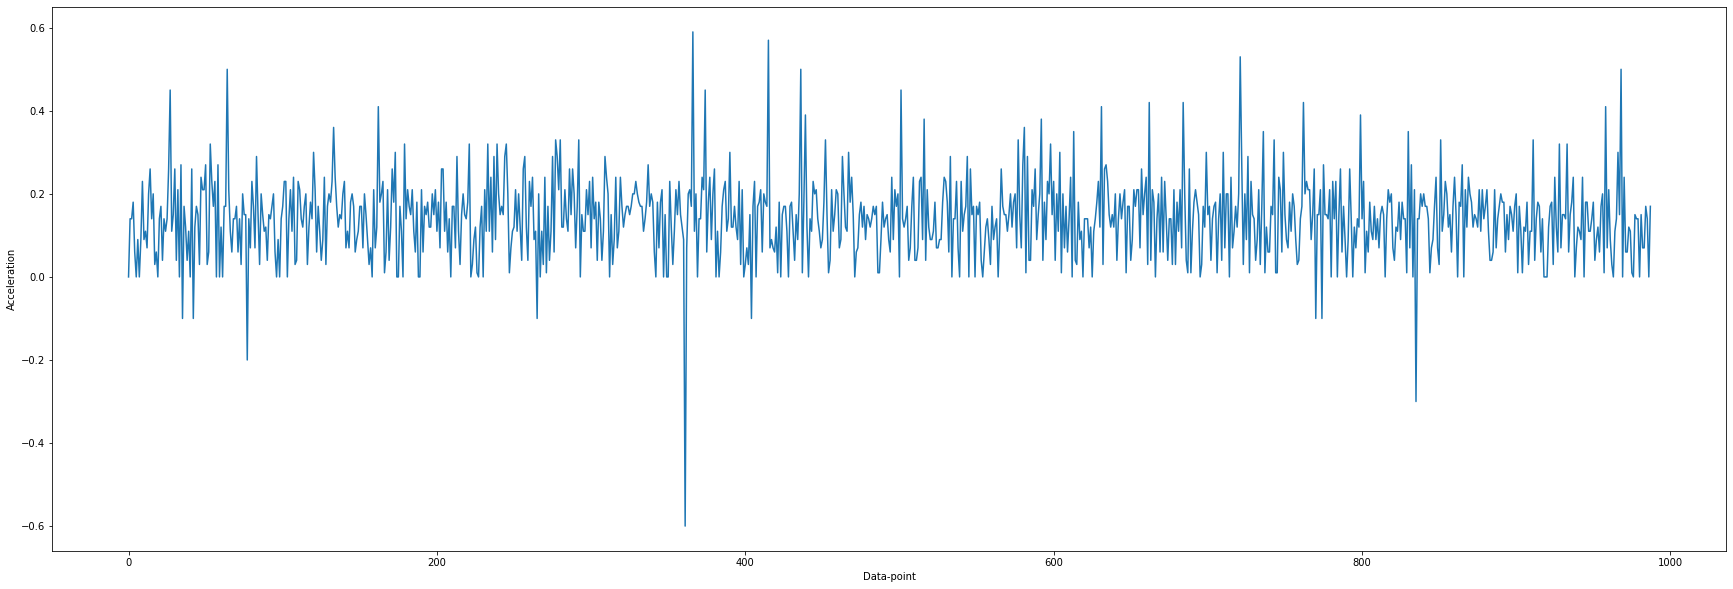

In [4]:
plt.figure(figsize=(30, 10))
plt.plot(d1)
plt.xlabel("Data-point")
plt.ylabel("Acceleration")    
plt.show()

plt.figure(figsize=(30, 10))
plt.plot(o1)
plt.xlabel("Data-point")
plt.ylabel("Acceleration")    
plt.show()

plt.figure(figsize=(30, 10))
plt.plot(i1)
plt.xlabel("Data-point")
plt.ylabel("Acceleration")    
plt.show()

plt.figure(figsize=(30, 10))
plt.plot(r1)
plt.xlabel("Data-point")
plt.ylabel("Acceleration")    
plt.show()

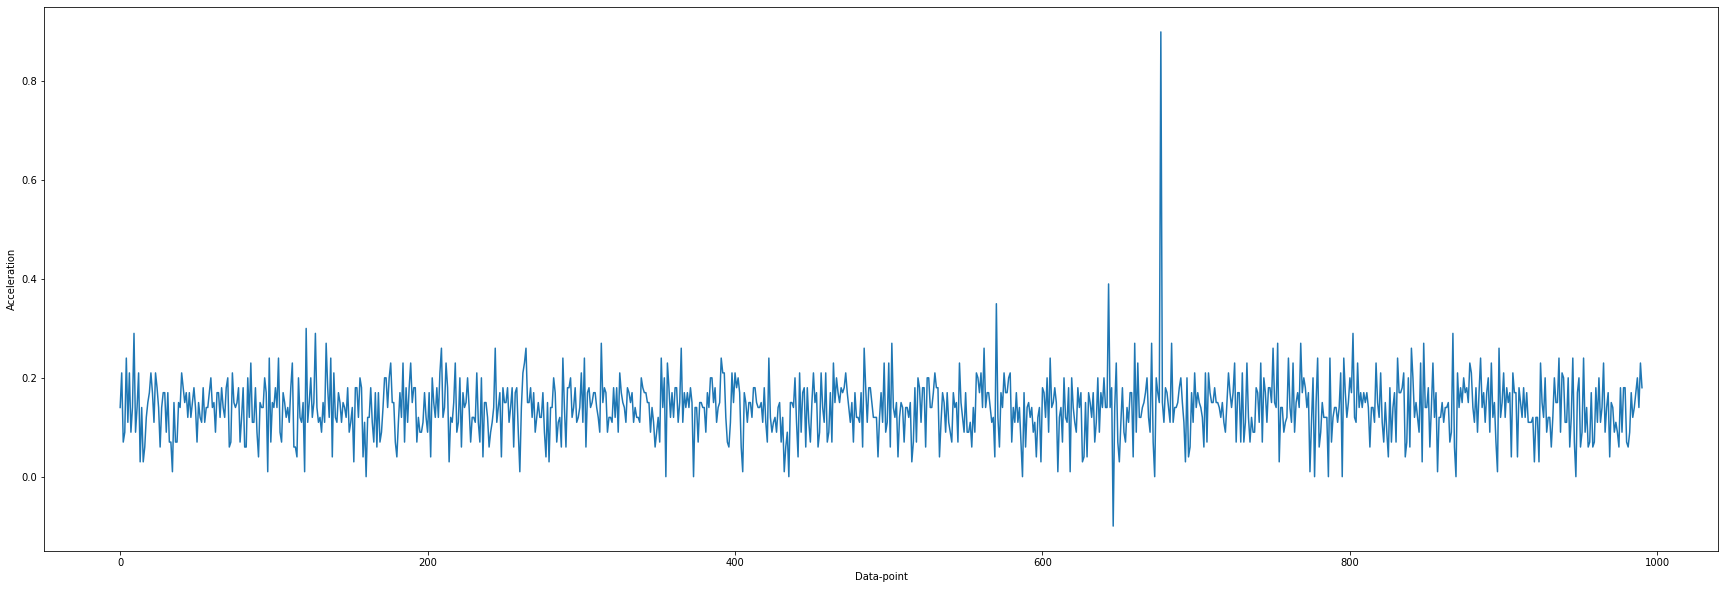

In [5]:
plt.figure(figsize=(30, 10))
plt.plot(d1)
plt.xlabel("Data-point")
plt.ylabel("Acceleration")    
plt.show()

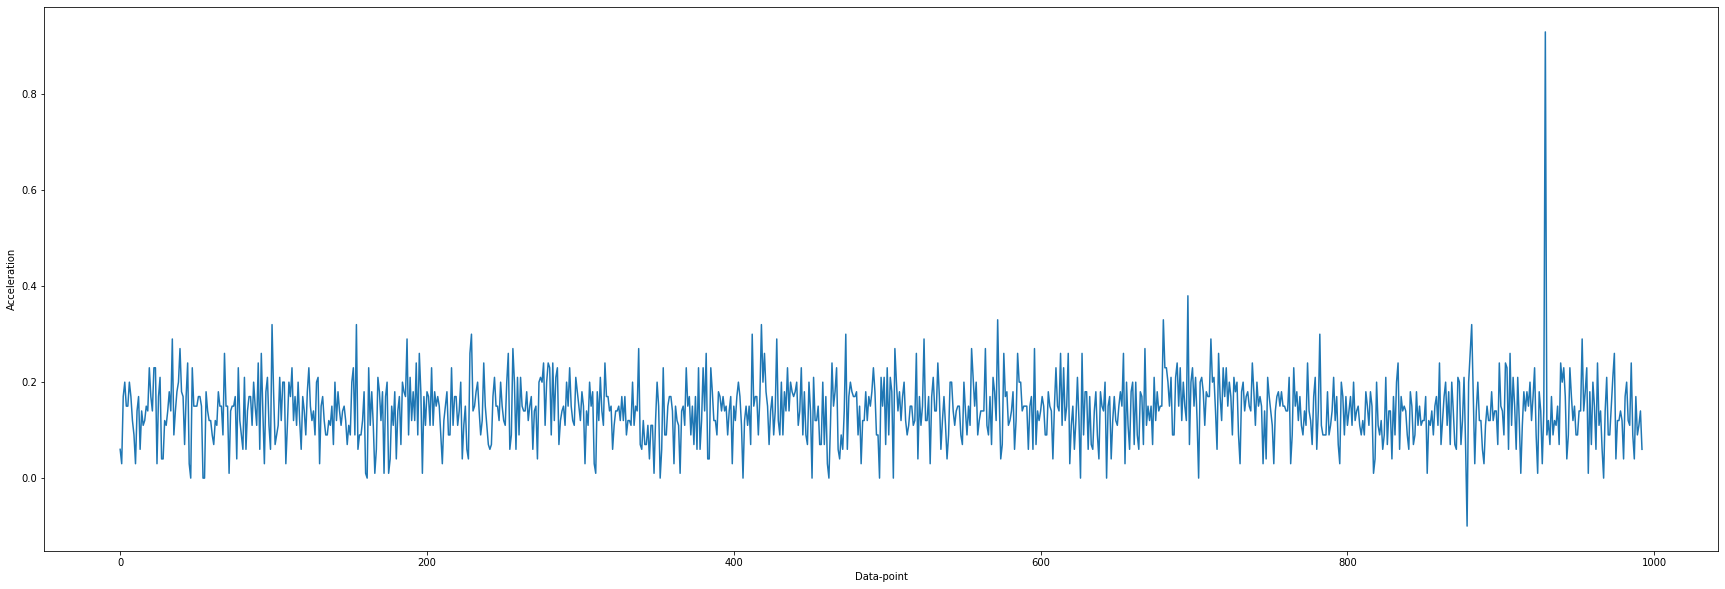

In [6]:
plt.figure(figsize=(30, 10))
plt.plot(d2)
plt.xlabel("Data-point")
plt.ylabel("Acceleration")    
plt.show()

max value of peak is 0.005875274595663937


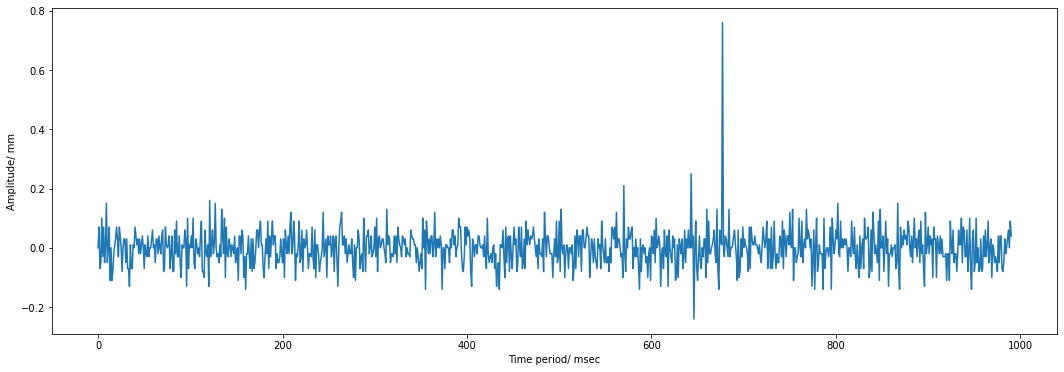

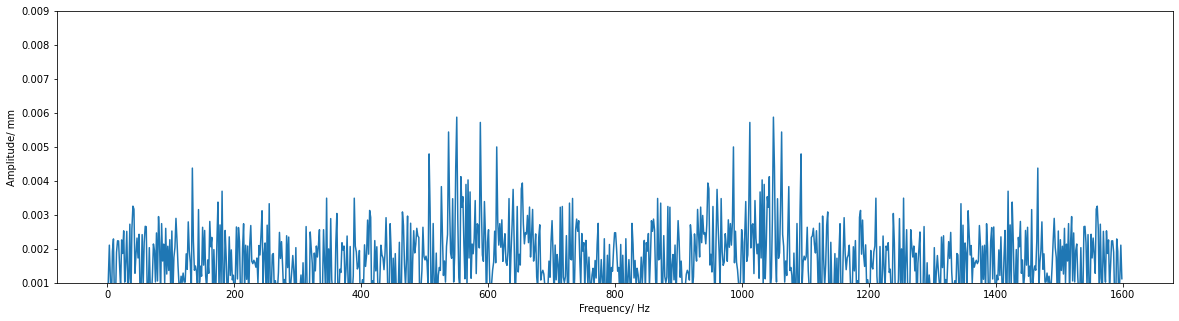

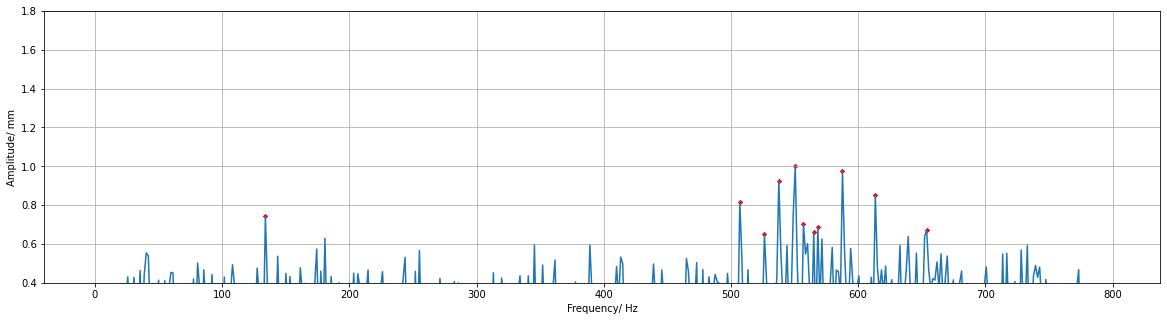

[134.00605449 506.96266398 526.3370333  537.63874874 550.55499495
 557.01311806 565.08577195 568.3148335  587.68920283 613.52169526
 653.88496468]


array([ 30.67608476,  58.12310797,  61.35216953,  66.19576186,
        72.65388496,  77.4974773 ,  92.02825429, 127.54793138,
       203.4308779 , 224.419778  , 243.79414733, 255.09586276,
       274.47023209, 340.66599395, 345.50958628, 361.65489405,
       372.95660949, 377.80020182, 410.09081736, 413.31987891,
       414.93440969, 439.15237134, 526.3370333 , 527.95156408,
       544.09687185, 550.55499495, 552.16952573, 560.24217962,
       565.08577195, 571.54389506, 582.84561049, 594.14732593,
       618.36528759, 661.95761857, 713.62260343, 773.36024218,
       783.04742684, 791.12008073])

In [40]:
#raw signal
d1['X'].plot(figsize=(18,6))
plt.xlabel('Time period/ msec')#Time signal/ raw signal (ye chahiye)
plt.ylabel('Amplitude/ mm') 
figure, axis = plt.subplots(1, 1, figsize=(20,5))

#Frequency domain representation
samplingFrequency =1600
d1['X']=d1['X']-d1['X'].mean()
fourierTransform1 = np.fft.fft(d1['X'])/len(d1['X'])           # Normalize amplitude
fourierTransform1 = fourierTransform1[range(int(len(d1['X']/2)))] # Exclude sampling frequency
tpCount1= len(d1['X'])
values1= np.arange(int(tpCount1))
timePeriod1= tpCount1/samplingFrequency
frequencies1= values1/timePeriod1
peaks, _= find_peaks(frequencies1, height=1)
plt.plot(frequencies1, abs(fourierTransform1))
plt.xlabel('Frequency/ Hz')
plt.ylabel('Amplitude/ mm')
plt.ylim(0.001,0.009)
plt.plot(peaks, frequencies1[peaks], "X")
plt.plot(np.zeros_like(frequencies1), "--", color="gray")


samplingFrequency =1600
fourierTransform1 = np.fft.fft(d1['X'])/len(d1['X'])           # Normalize amplitude
fourierTransform1 = fourierTransform1[range(int(len(d1['X'])/2))] # Exclude sampling frequency
tpCount1     = len(d1['X'])
values1      = np.arange(int(tpCount1/2))
timePeriod1  = tpCount1/samplingFrequency
frequencies1 = values1/timePeriod1
z=np.max(abs(fourierTransform1))
print('max value of peak is' ,z)
r=abs(fourierTransform1)/z
peaks = find_peaks(r, height = 0.65, threshold = 0.001, distance = 1)
height = peaks[1]['peak_heights'] #list containing the height of the peaks
peak_pos = frequencies1[peaks[0]]   #list containing the positions of the peaks
fig= plt.figure(figsize=(20,5))
plt.plot(frequencies1,r)
plt.scatter(peak_pos, height, color = 'r', s = 8, marker = 'D', label = 'maxima')
plt.xlabel('Frequency/ Hz')
plt.ylabel('Amplitude/ mm')
plt.ylim(0.4,1.8)
plt.grid()

plt.show()
print(peak_pos)
frequencies1[fourierTransform1>0.002]

max value of peak is 0.009754814841453987


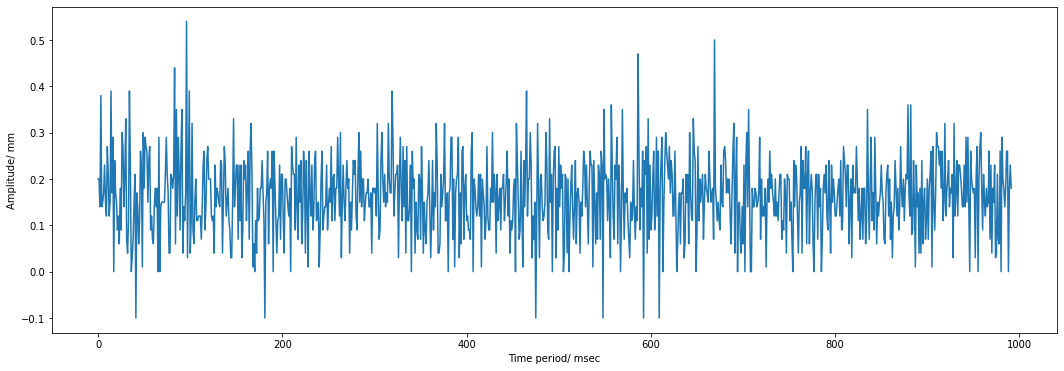

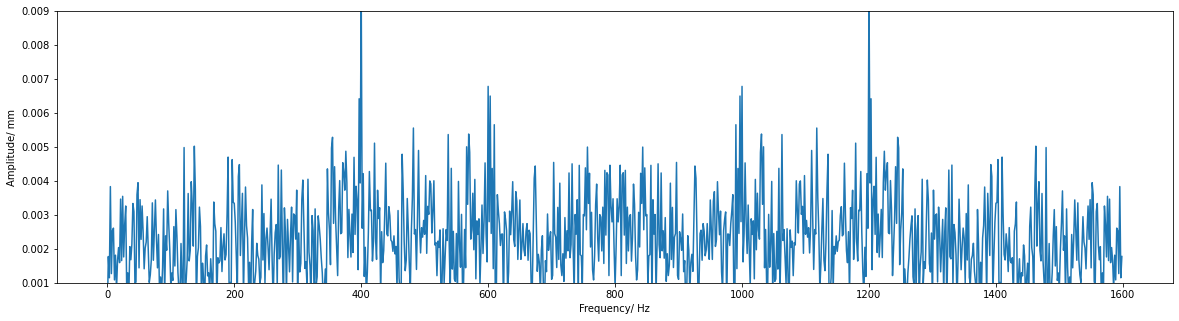

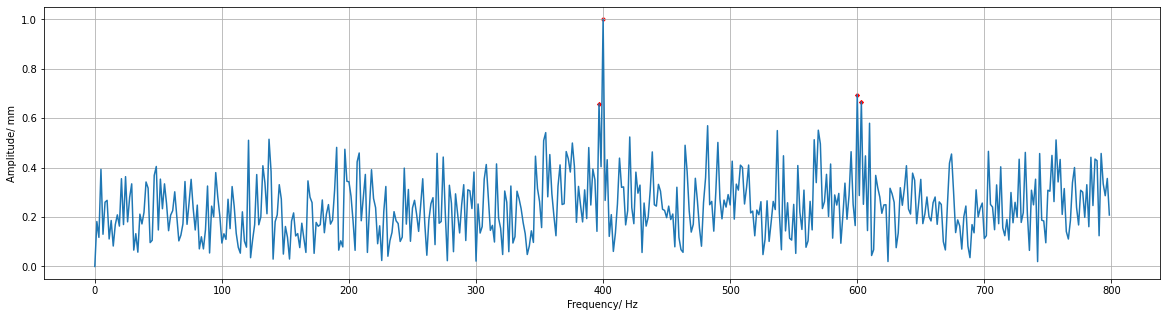

array([  4.83870968,  20.96774194,  24.19354839,  29.03225806,
        41.93548387,  51.61290323,  54.83870968,  56.4516129 ,
       127.41935484, 133.87096774, 137.09677419, 179.03225806,
       182.25806452, 183.87096774, 196.77419355, 212.90322581,
       217.74193548, 227.41935484, 250.        , 251.61290323,
       258.06451613, 264.51612903, 279.03225806, 280.64516129,
       283.87096774, 306.4516129 , 316.12903226, 322.58064516,
       324.19354839, 327.41935484, 332.25806452, 335.48387097,
       366.12903226, 374.19354839, 375.80645161, 401.61290323,
       406.4516129 , 416.12903226, 419.35483871, 420.96774194,
       425.80645161, 464.51612903, 466.12903226, 480.64516129,
       482.25806452, 485.48387097, 488.70967742, 491.93548387,
       500.        , 501.61290323, 506.4516129 , 509.67741935,
       529.03225806, 550.        , 566.12903226, 567.74193548,
       570.96774194, 579.03225806, 582.25806452, 583.87096774,
       585.48387097, 595.16129032, 600.        , 601.61

In [8]:
#raw signal
o1['X'].plot(figsize=(18,6))
plt.xlabel('Time period/ msec')#Time signal/ raw signal (ye chahiye)
plt.ylabel('Amplitude/ mm') 
figure, axis = plt.subplots(1, 1, figsize=(20,5))

#Frequency domain representation
samplingFrequency =1600
o1['X']=o1['X']-o1['X'].mean()
fourierTransform1 = np.fft.fft(o1['X'])/len(o1['X'])           # Normalize amplitude
fourierTransform1 = fourierTransform1[range(int(len(o1['X']/2)))] # Exclude sampling frequency
tpCount1= len(o1['X'])
values1= np.arange(int(tpCount1))
timePeriod1= tpCount1/samplingFrequency
frequencies1= values1/timePeriod1
peaks, _= find_peaks(frequencies1, height=1)
plt.plot(frequencies1, abs(fourierTransform1))
plt.xlabel('Frequency/ Hz')
plt.ylabel('Amplitude/ mm')
plt.ylim(0.001,0.009)
plt.plot(peaks, frequencies1[peaks], "X")
plt.plot(np.zeros_like(frequencies1), "--", color="gray") 
#raw signal
#d2['X'].plot(figsize=(18,6))
#plt.xlabel('Time period/ msec')#Time signal/ raw signal (ye chahiye)
#plt.ylabel('Amplitude/ mm') 
#figure, axis = plt.subplots(1, 1, figsize=(20,5)) aisi ha

#Frequency domain representation
samplingFrequency =1600
fourierTransform1 = np.fft.fft(o1['X'])/len(o1['X'])           # Normalize amplitude
fourierTransform1 = fourierTransform1[range(int(len(o1['X'])/2))] # Exclude sampling frequency
tpCount1     = len(o1['X'])
values1      = np.arange(int(tpCount1/2))
timePeriod1  = tpCount1/samplingFrequency
frequencies1 = values1/timePeriod1
z=np.max(abs(fourierTransform1))
print('max value of peak is' ,z)
r=abs(fourierTransform1)/z
peaks = find_peaks(r, height = 0.65, threshold = 0.001, distance = 1)
height = peaks[1]['peak_heights'] #list containing the height of the peaks
peak_pos = frequencies1[peaks[0]]   #list containing the positions of the peaks
fig= plt.figure(figsize=(20,5))
plt.plot(frequencies1,r)
plt.scatter(peak_pos, height, color = 'r', s = 8, marker = 'D', label = 'maxima')
plt.xlabel('Frequency/ Hz')
plt.ylabel('Amplitude/ mm')
plt.grid()

plt.show()
#print(peak_pos)
frequencies1[fourierTransform1>0.002]

max value of peak is 0.008772652642145173


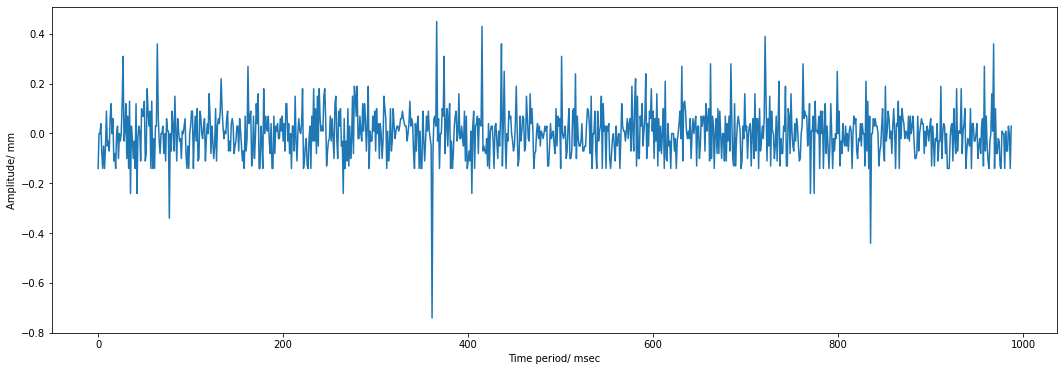

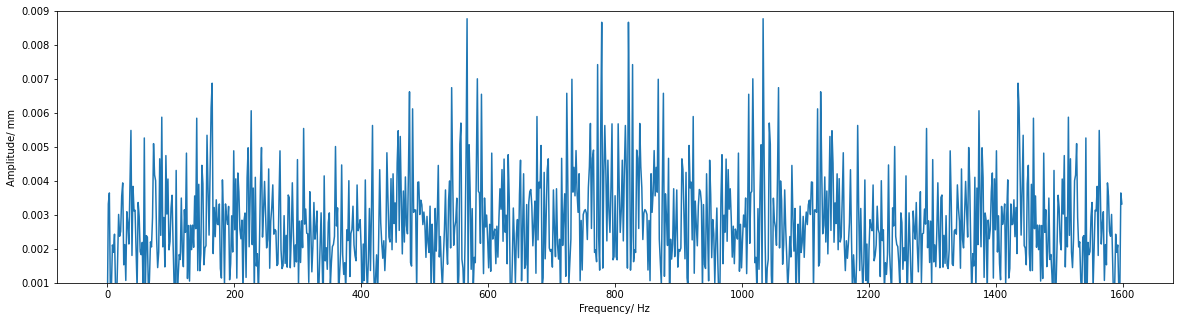

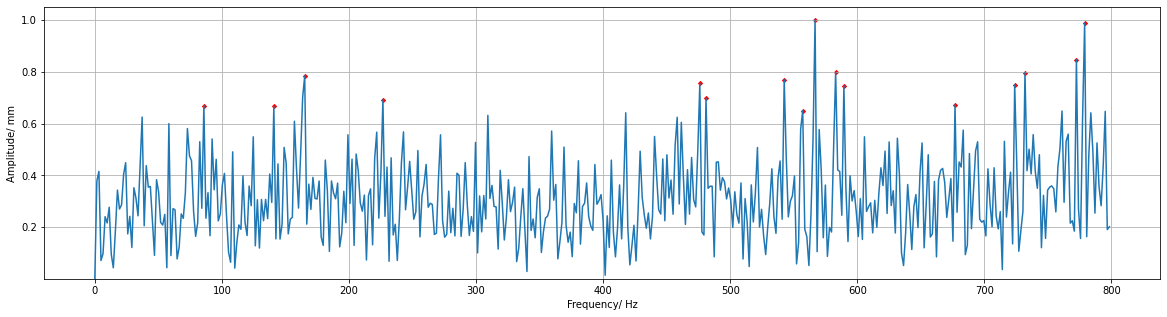

array([ 24.29149798,  58.29959514,  61.53846154,  72.87449393,
        85.82995951,  93.92712551,  98.7854251 , 108.50202429,
       121.45748988, 131.17408907, 144.12955466, 148.98785425,
       150.60728745, 157.08502024, 161.94331984, 171.65991903,
       176.51821862, 195.951417  , 205.66801619, 215.38461538,
       226.72064777, 228.34008097, 241.29554656, 254.25101215,
       286.63967611, 299.5951417 , 310.93117409, 319.02834008,
       323.88663968, 330.36437247, 348.17813765, 361.13360324,
       427.53036437, 432.38866397, 435.62753036, 443.72469636,
       450.20242915, 455.06072874, 456.68016194, 463.15789474,
       466.39676113, 474.49392713, 480.97165992, 489.06882591,
       532.79352227, 537.65182186, 542.51012146, 547.36842105,
       565.18218623, 570.04048583, 581.37651822, 582.99595142,
       594.33198381, 608.90688259, 623.48178138, 628.34008097,
       633.19838057, 639.67611336, 667.20647773, 691.49797571,
       694.73684211, 702.8340081 , 707.69230769, 709.31

In [18]:
#raw signal
r1['X'].plot(figsize=(18,6))
plt.xlabel('Time period/ msec')#Time signal/ raw signal (ye chahiye)
plt.ylabel('Amplitude/ mm') 
figure, axis = plt.subplots(1, 1, figsize=(20,5))

#Frequency domain representation
samplingFrequency =1600
r1['X']=r1['X']-r1['X'].mean()
fourierTransform1 = np.fft.fft(r1['X'])/len(r1['X'])           # Normalize amplitude
fourierTransform1 = fourierTransform1[range(int(len(r1['X']/2)))] # Exclude sampling frequency
tpCount1= len(r1['X'])
values1= np.arange(int(tpCount1))
timePeriod1= tpCount1/samplingFrequency
frequencies1= values1/timePeriod1
peaks, _= find_peaks(frequencies1, height=1)
plt.plot(frequencies1, abs(fourierTransform1))
plt.xlabel('Frequency/ Hz')
plt.ylabel('Amplitude/ mm')
plt.ylim(0.001,0.009)
plt.plot(peaks, frequencies1[peaks], "X")
plt.plot(np.zeros_like(frequencies1), "--", color="gray") 
#raw signal
#d2['X'].plot(figsize=(18,6))
#plt.xlabel('Time period/ msec')#Time signal/ raw signal (ye chahiye)
#plt.ylabel('Amplitude/ mm') 
#figure, axis = plt.subplots(1, 1, figsize=(20,5)) aisi ha

#Frequency domain representation
samplingFrequency =1600
fourierTransform1 = np.fft.fft(r1['X'])/len(r1['X'])           # Normalize amplitude
fourierTransform1 = fourierTransform1[range(int(len(r1['X'])/2))] # Exclude sampling frequency
tpCount1     = len(r1['X'])
values1      = np.arange(int(tpCount1/2))
timePeriod1  = tpCount1/samplingFrequency
frequencies1 = values1/timePeriod1
z=np.max(abs(fourierTransform1))
print('max value of peak is' ,z)
r=abs(fourierTransform1)/z
peaks = find_peaks(r, height = 0.65, threshold = 0.001, distance = 1)
height = peaks[1]['peak_heights'] #list containing the height of the peaks
peak_pos = frequencies1[peaks[0]]   #list containing the positions of the peaks
fig= plt.figure(figsize=(20,5))
plt.plot(frequencies1,r)
plt.scatter(peak_pos, height, color = 'r', s = 8, marker = 'D', label = 'maxima')
plt.xlabel('Frequency/ Hz')
plt.ylabel('Amplitude/ mm')
plt.ylim(0.001)
plt.grid()

plt.show()
#print(peak_pos)
frequencies1[fourierTransform1>0.002]

max value of peak is 0.009464560371232143


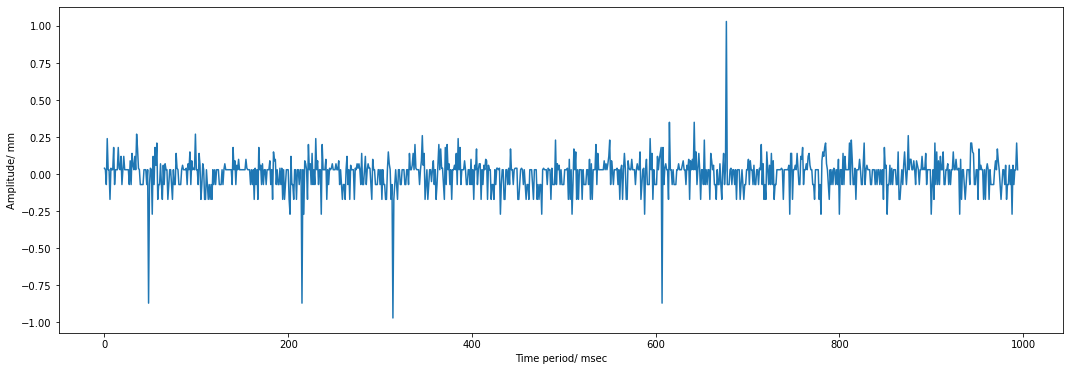

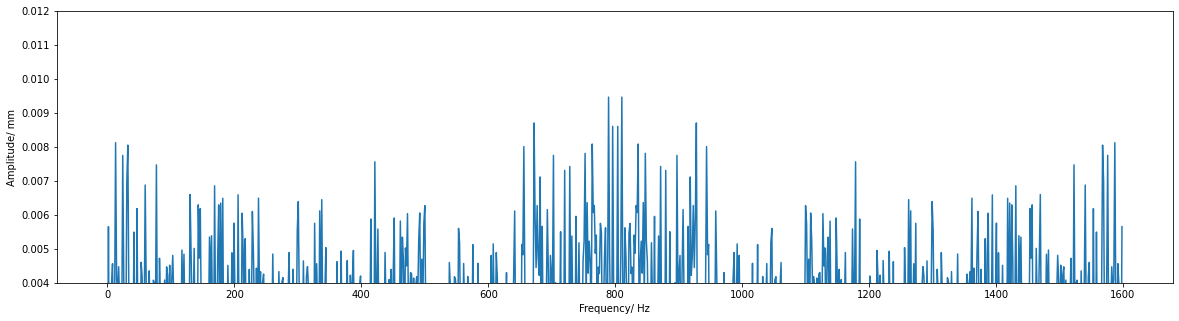

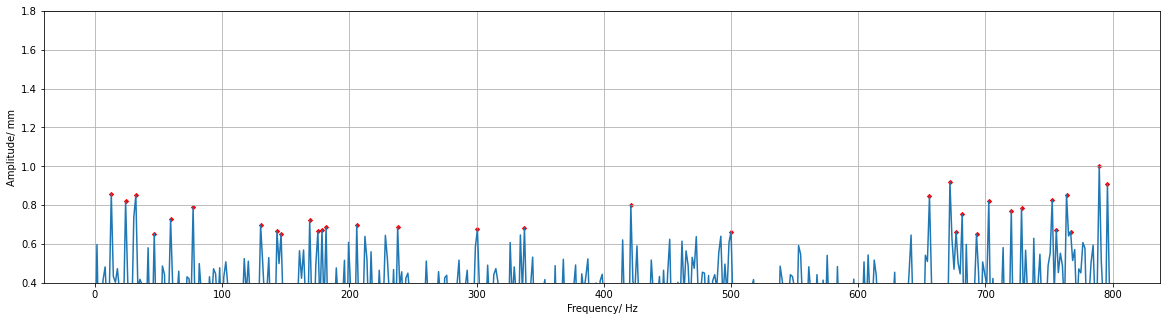

array([130.25125628, 146.33165829, 175.27638191, 344.12060302,
       472.7638191 , 673.76884422, 685.02512563, 702.71356784,
       755.77889447, 778.29145729, 789.54773869])

In [41]:
#raw signal
i1['X'].plot(figsize=(18,6))
plt.xlabel('Time period/ msec')#Time signal/ raw signal (ye chahiye)
plt.ylabel('Amplitude/ mm') 
figure, axis = plt.subplots(1, 1, figsize=(20,5))

#Frequency domain representation
samplingFrequency =1600
i1['X']=i1['X']-i1['X'].mean()
fourierTransform1 = np.fft.fft(i1['X'])/len(i1['X'])           # Normalize amplitude
fourierTransform1 = fourierTransform1[range(int(len(i1['X']/2)))] # Exclude sampling frequency
tpCount1= len(i1['X'])
values1= np.arange(int(tpCount1))
timePeriod1= tpCount1/samplingFrequency
frequencies1= values1/timePeriod1
peaks, _= find_peaks(frequencies1, height=1)
plt.plot(frequencies1, abs(fourierTransform1))
plt.xlabel('Frequency/ Hz')
plt.ylabel('Amplitude/ mm')
plt.ylim(0.004,0.012)
plt.plot(peaks, frequencies1[peaks], "X")
plt.plot(np.zeros_like(frequencies1), "--", color="gray") 
#raw signal
#d2['X'].plot(figsize=(18,6))
#plt.xlabel('Time period/ msec')#Time signal/ raw signal (ye chahiye)
#plt.ylabel('Amplitude/ mm') 
#figure, axis = plt.subplots(1, 1, figsize=(20,5)) aisi ha

#Frequency domain representation
samplingFrequency =1600
fourierTransform1 = np.fft.fft(i1['X'])/len(i1['X'])           # Normalize amplitude
fourierTransform1 = fourierTransform1[range(int(len(i1['X'])/2))] # Exclude sampling frequency
tpCount1     = len(i1['X'])
values1      = np.arange(int(tpCount1/2))
timePeriod1  = tpCount1/samplingFrequency
frequencies1 = values1/timePeriod1
z=np.max(abs(fourierTransform1))
print('max value of peak is' ,z)
r=abs(fourierTransform1)/z
peaks = find_peaks(r, height = 0.65, threshold = 0.001, distance = 1)
height = peaks[1]['peak_heights'] #list containing the height of the peaks
peak_pos = frequencies1[peaks[0]]   #list containing the positions of the peaks
fig= plt.figure(figsize=(20,5))
plt.plot(frequencies1,r)
plt.scatter(peak_pos, height, color = 'r', s = 8, marker = 'D', label = 'maxima')
plt.xlabel('Frequency/ Hz')
plt.ylabel('Amplitude/ mm')
plt.ylim(0.4,1.8)
plt.grid()

plt.show()
#print(peak_pos)
frequencies1[fourierTransform1>0.005]

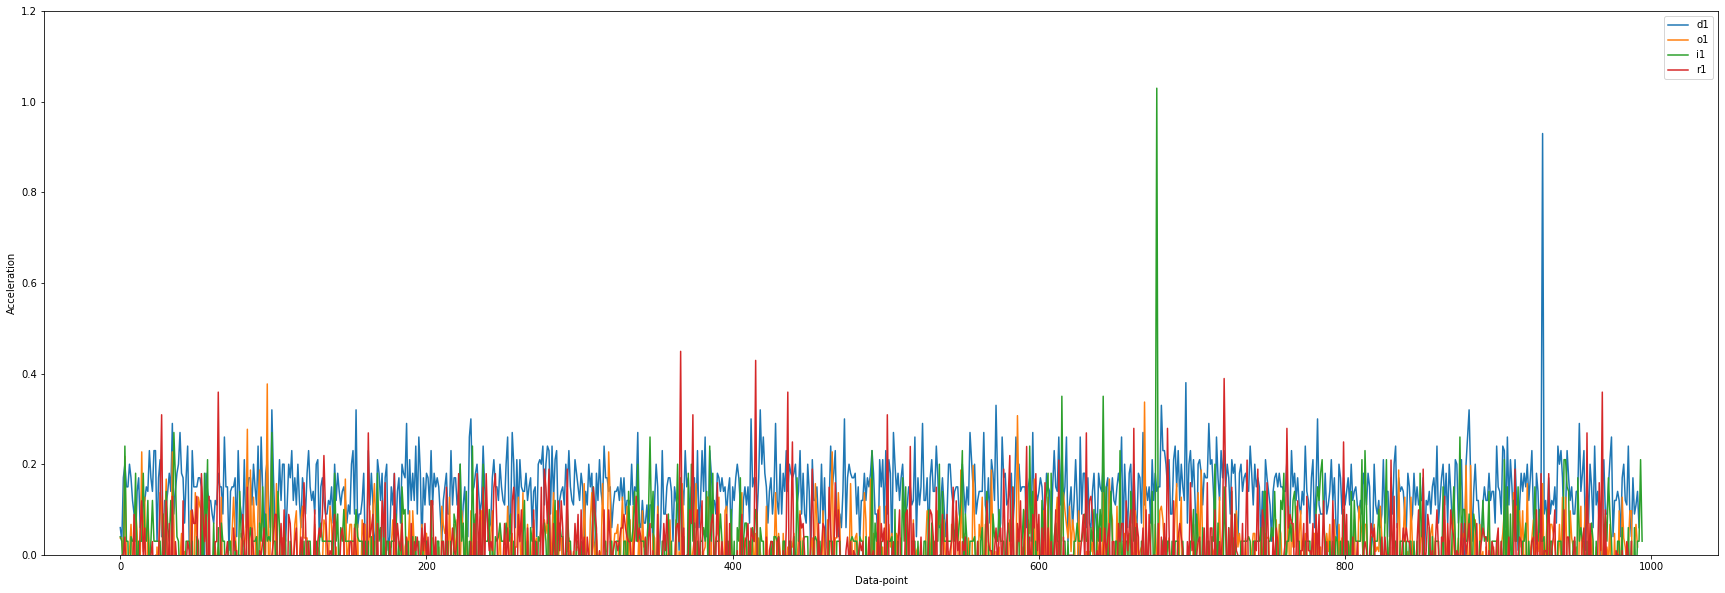

In [27]:
#trying only not important
from scipy.signal import argrelextrema
plt.figure(figsize=(30,10))
plt.ylim(0,1.2)
np1=np.array(d1)
plt.plot(d2)
plt.plot(o1)
plt.plot(i1)
plt.plot(r1)
plt.xlabel("Data-point")
plt.ylabel("Acceleration")    
plt.legend(['d1','o1','i1','r1'])
plt.show()

max value of peak is 0.006765141535265792


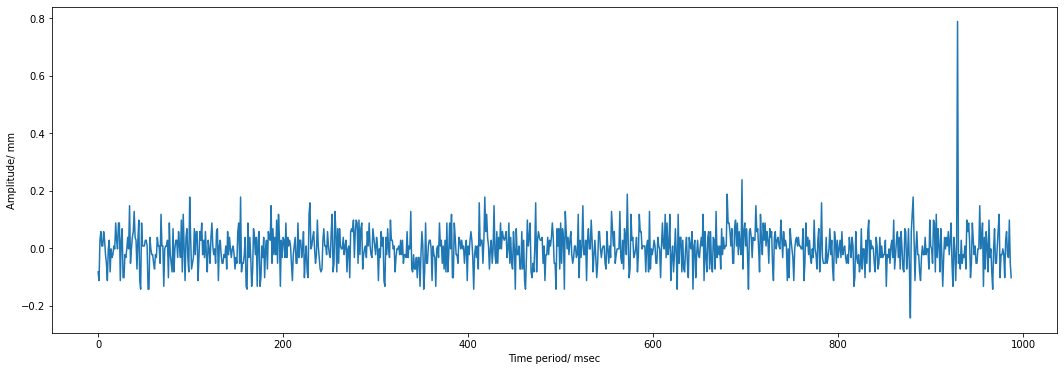

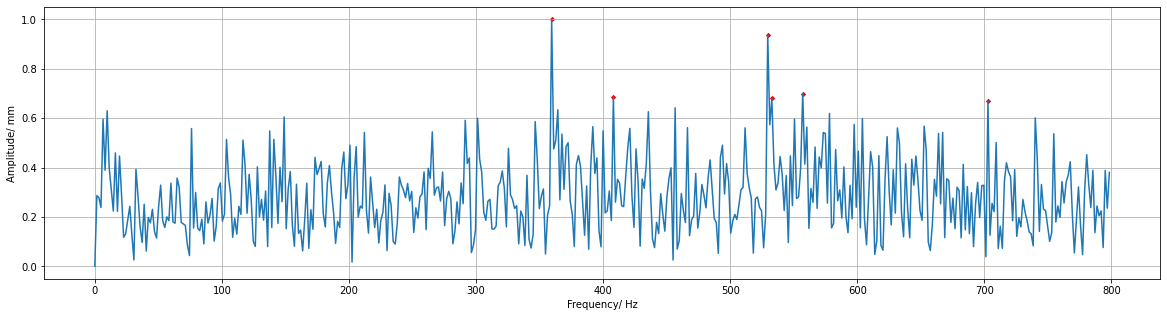

In [201]:
#raw signal
d2['X'].plot(figsize=(18,6))
plt.xlabel('Time period/ msec')#Time signal/ raw signal (ye chahiye)
plt.ylabel('Amplitude/ mm') 
#figure, axis = plt.subplots(1, 1, figsize=(20,5)) aisi ha

#Frequency domain representation
samplingFrequency =1600
fourierTransform1 = np.fft.fft(d2['X'])/len(d2['X'])           # Normalize amplitude
fourierTransform1 = fourierTransform1[range(int(len(d2['X'])/2))] # Exclude sampling frequency
tpCount1     = len(d2['X'])
values1      = np.arange(int(tpCount1/2))
timePeriod1  = tpCount1/samplingFrequency
frequencies1 = values1/timePeriod1
z=np.max(abs(fourierTransform1))
print('max value of peak is' ,z)
r=abs(fourierTransform1)/z
peaks = find_peaks(r, height = 0.65, threshold = 0.001, distance = 1)
height = peaks[1]['peak_heights'] #list containing the height of the peaks
peak_pos = frequencies1[peaks[0]]   #list containing the positions of the peaks
fig= plt.figure(figsize=(20,5))
plt.plot(frequencies1,r)
plt.scatter(peak_pos, height, color = 'r', s = 8, marker = 'D', label = 'maxima')
plt.xlabel('Frequency/ Hz')
plt.ylabel('Amplitude/ mm')
plt.grid()

plt.show()
#print(peak_pos)
frequencies1[fourierTransform1>0.002]  #MAX PEAK YAHAN SA ARAHI HA [RED DOT WALA GRAPH]



In [42]:
d1.shape
d1 = d1.head(988)

In [43]:
d1.shape

(988, 1)

In [44]:
d2.shape
d2 = d2.head(988)

In [79]:
d3.shape
d3 = d3.head(988)

,X
0,-0.011569
1,0.048431
2,-0.041569
3,0.078431
4,-0.121569
...,...
983,0.008431
984,0.108431
985,-0.071569
986,0.048431


In [118]:
dataset = pd.read_csv(r'C:\Users\User\Desktop\testrundataset\healthyA3\gg.csv')
dataset.columns = ['X']
dataset.head()
dataset['X']=dataset['X'].astype(float)

Text(0, 0.5, 'Amplitude/ mm')

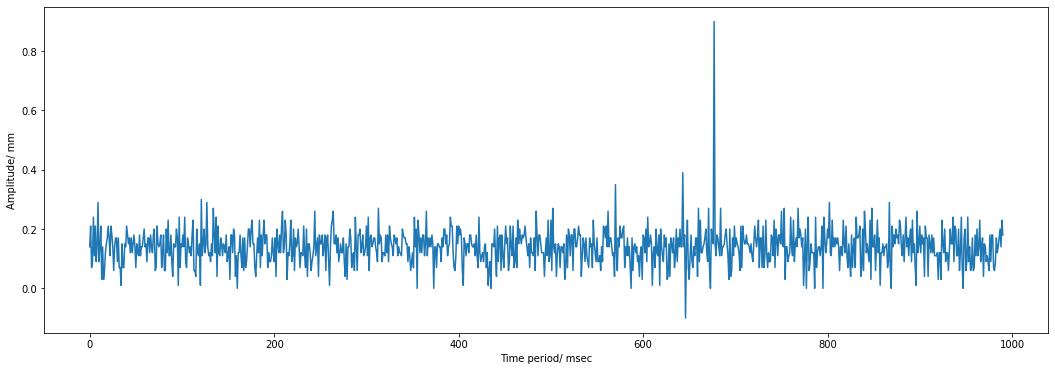

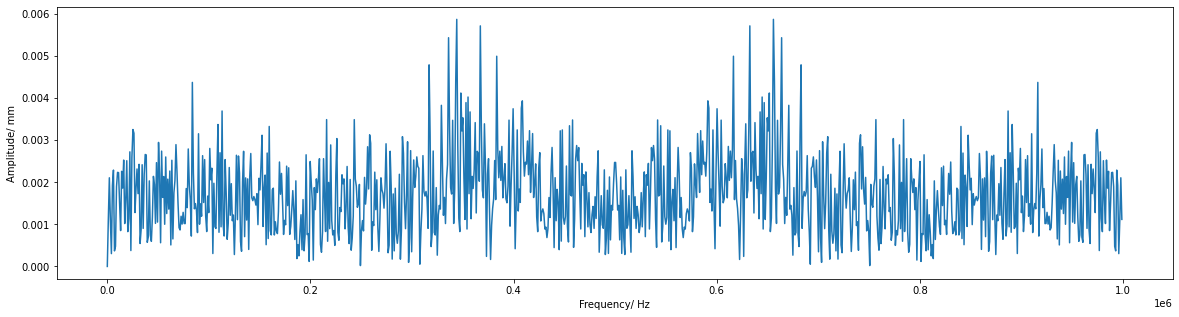

In [119]:
#raw signal
dataset['X'].plot(figsize=(18,6))
plt.xlabel('Time period/ msec')#Time signal/ raw signal (ye chahiye)
plt.ylabel('Amplitude/ mm') 
figure, axis = plt.subplots(1, 1, figsize=(20,5))

#Frequency domain representation
samplingFrequency =1000000
dataset['X']=dataset['X']-dataset['X'].mean()
fourierTransform1 = np.fft.fft(dataset['X'])/len(dataset['X'])           # Normalize amplitude
fourierTransform1 = fourierTransform1[range(int(len(dataset['X']/2)))] # Exclude sampling frequency
tpCount1= len(dataset['X'])
values1= np.arange(int(tpCount1))
timePeriod1= tpCount1/samplingFrequency
frequencies1= values1/timePeriod1
peaks, _= find_peaks(frequencies1, height=1)
plt.plot(frequencies1, abs(fourierTransform1))
plt.xlabel('Frequency/ Hz')
plt.ylabel('Amplitude/ mm')
#plt.plot(peaks, frequencies1[peaks], "X")
#plt.plot(np.zeros_like(frequencies1), "--", color="gray")

max value of peak is 0.005875274595663937


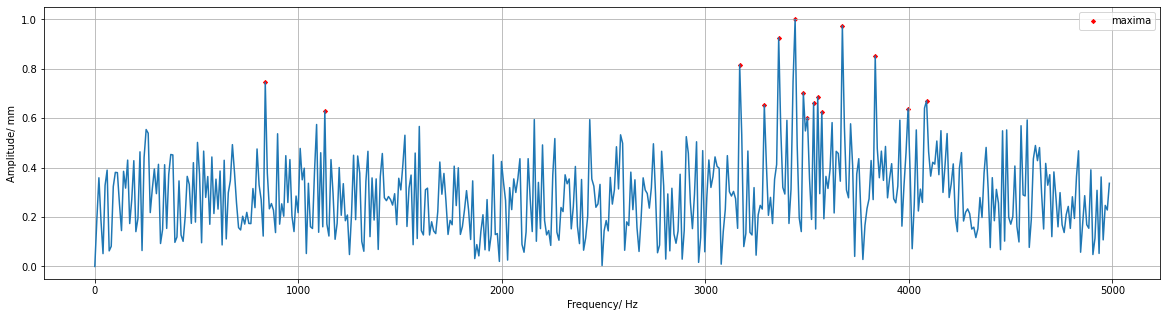

[ 837.53784057 1130.1715439  3168.51664985 3289.60645812 3360.24217962
 3440.96871847 3481.33198789 3501.5136226  3531.78607467 3551.96770938
 3572.1493441  3673.05751766 3834.51059536 3995.96367306 4086.78102926]


array([ 191.72552977,  363.26942482,  383.45105954,  413.7235116 ,
        454.08678103,  484.3592331 ,  575.1765893 ,  797.17457114,
       1271.44298688, 1402.62361251, 1523.71342079, 1594.34914228,
       1715.43895055, 2129.16246216, 2159.43491423, 2260.34308779,
       2330.97880928, 2361.25126135, 2563.06760848, 2583.24924319,
       2593.34006054, 2744.70232089, 3289.60645812, 3299.69727548,
       3400.60544904, 3440.96871847, 3451.05953582, 3501.5136226 ,
       3531.78607467, 3572.1493441 , 3642.78506559, 3713.42078708,
       3864.78304743, 4137.23511604, 4460.14127144, 4833.50151362,
       4894.04641776, 4944.50050454])

In [120]:
#Frequency domain representation
samplingFrequency =10000
fourierTransform1 = np.fft.fft(dataset['X'])/len(dataset['X'])           # Normalize amplitude
fourierTransform1 = fourierTransform1[range(int(len(dataset['X'])/2))] # Exclude sampling frequency
tpCount1     = len(dataset['X'])
values1      = np.arange(int(tpCount1/2))
timePeriod1  = tpCount1/samplingFrequency
frequencies1 = values1/timePeriod1
z=np.max(abs(fourierTransform1))
print('max value of peak is' ,z)
r=abs(fourierTransform1)/z
peaks = find_peaks(r, height = 0.6, threshold = 0.001, distance = 1)
height = peaks[1]['peak_heights'] #list containing the height of the peaks
peak_pos = frequencies1[peaks[0]]   #list containing the positions of the peaks
fig= plt.figure(figsize=(20,5))
plt.plot(frequencies1, r)
plt.scatter(peak_pos, height, color = 'r', s = 8, marker = 'D', label = 'maxima')
plt.xlabel('Frequency/ Hz')
plt.ylabel('Amplitude/ mm')
plt.legend()
plt.grid()
plt.show()
print(peak_pos)
frequencies1[fourierTransform1>0.002]  #MAX PEAK YAHAN SA ARAHI HA [RED DOT WALA GRAPH]

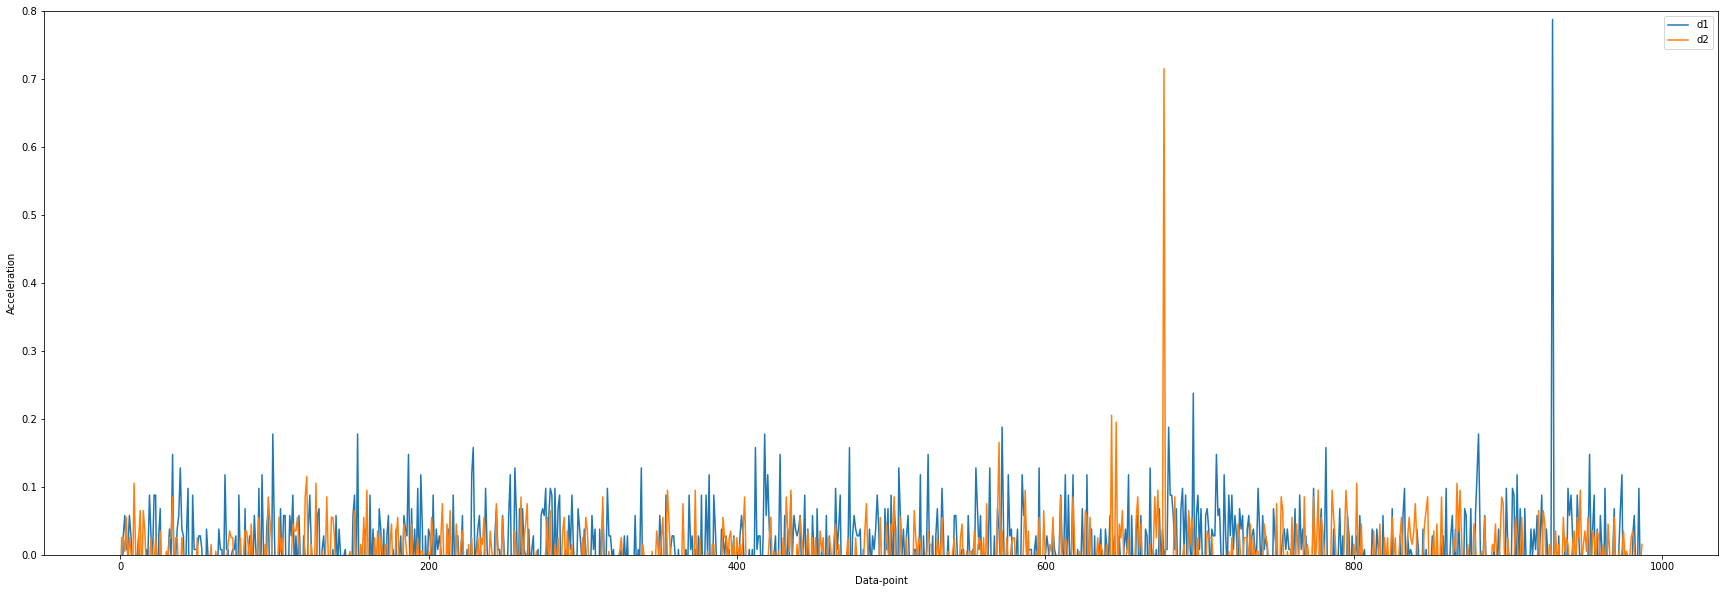

In [220]:
#trying only not important
from scipy.signal import argrelextrema
plt.figure(figsize=(30,10))
plt.ylim(0,0.8)
np1=np.array(d1)
plt.plot(d2)
plt.plot(d1)
plt.xlabel("Data-point")
plt.ylabel("Acceleration")    
plt.legend(['d1','d2'])
plt.show()

Text(0, 0.5, 'Amplitude/ mm')

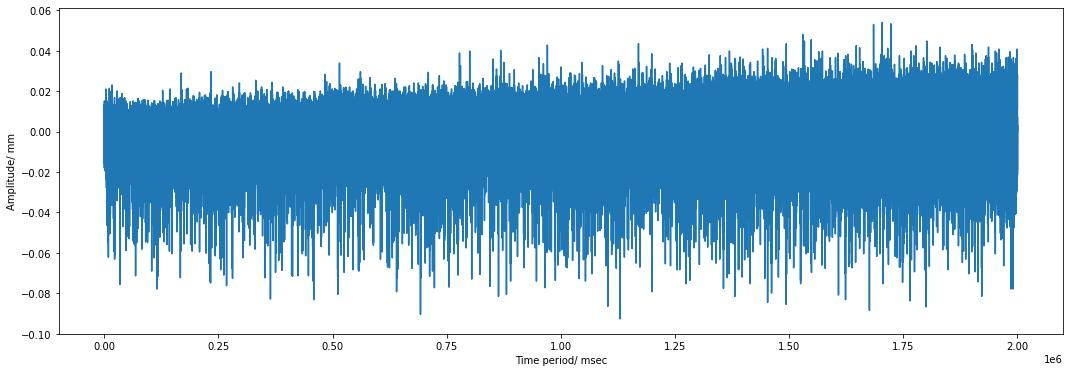

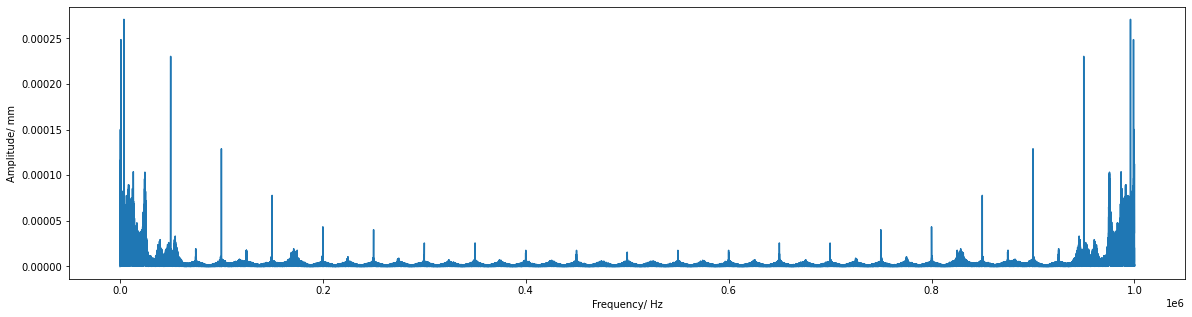

In [11]:
#raw signal
dataset['0'].plot(figsize=(18,6))
plt.xlabel('Time period/ msec')#Time signal/ raw signal (ye chahiye)
plt.ylabel('Amplitude/ mm') 
figure, axis = plt.subplots(1, 1, figsize=(20,5))

#Frequency domain representation
samplingFrequency =1000000
dataset['0']=dataset['0']-dataset['0'].mean()
fourierTransform1 = np.fft.fft(dataset['0'])/len(dataset['0'])           # Normalize amplitude
fourierTransform1 = fourierTransform1[range(int(len(dataset['0']/2)))] # Exclude sampling frequency
tpCount1= len(dataset['0'])
values1= np.arange(int(tpCount1))
timePeriod1= tpCount1/samplingFrequency
frequencies1= values1/timePeriod1
peaks, _= find_peaks(frequencies1, height=1)
plt.plot(frequencies1, abs(fourierTransform1))
plt.xlabel('Frequency/ Hz')
plt.ylabel('Amplitude/ mm')
#plt.plot(peaks, frequencies1[peaks], "X")
#plt.plot(np.zeros_like(frequencies1), "--", color="gray")

Text(0, 0.5, 'Amplitude/ mm')

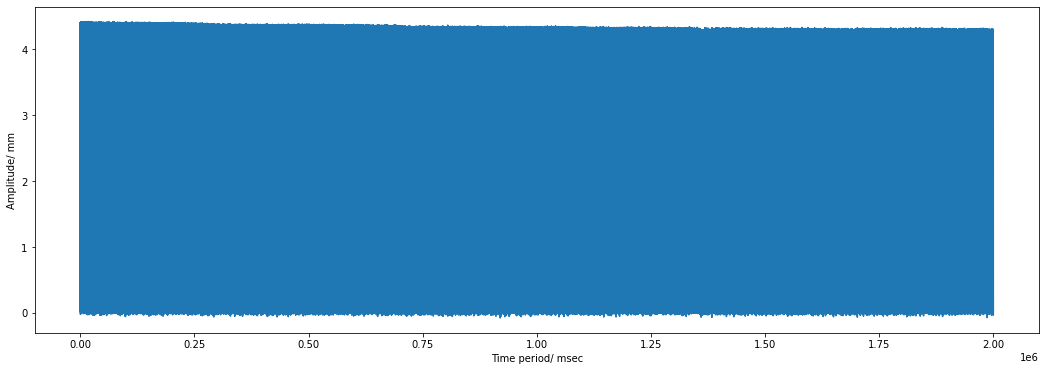

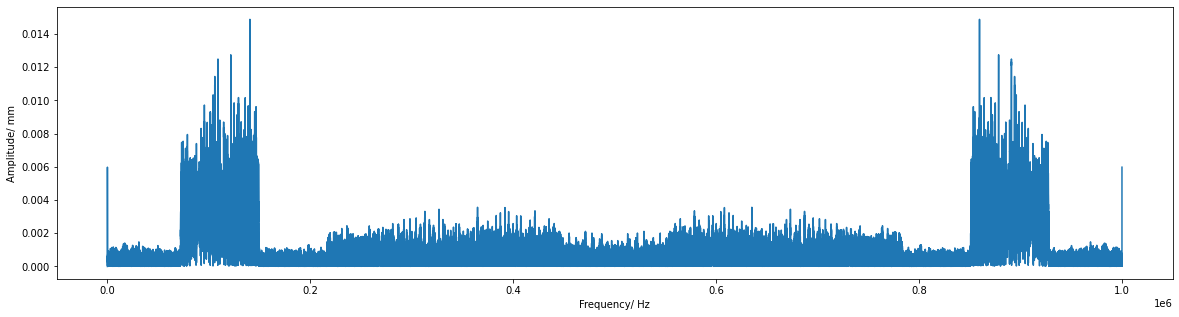

In [12]:
#raw signal
dataset1['0'].plot(figsize=(18,6))
plt.xlabel('Time period/ msec')#Time signal/ raw signal (ye chahiye)
plt.ylabel('Amplitude/ mm') 
figure, axis = plt.subplots(1, 1, figsize=(20,5))

#Frequency domain representation
samplingFrequency =1000000
dataset1['0']=dataset1['0']-dataset1['0'].mean()
fourierTransform1 = np.fft.fft(dataset1['0'])/len(dataset1['0'])           # Normalize amplitude
fourierTransform1 = fourierTransform1[range(int(len(dataset1['0']/2)))] # Exclude sampling frequency
tpCount1= len(dataset1['0'])
values1= np.arange(int(tpCount1))
timePeriod1= tpCount1/samplingFrequency
frequencies1= values1/timePeriod1
peaks, _= find_peaks(frequencies1, height=1)
plt.plot(frequencies1, abs(fourierTransform1))
plt.xlabel('Frequency/ Hz')
plt.ylabel('Amplitude/ mm')
#plt.plot(peaks, frequencies1[peaks], "X")
#plt.plot(np.zeros_like(frequencies1), "--", color="gray")